In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import os
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200

In [10]:
d = np.array([[-1.75,-1],[-1.75,1],[2.25,1],[1.25,-1]])
c = 1/3 * d.T @ d
print(c)
u,s,v = np.linalg.svd(c)
print(s,u)

[[4.25       0.33333333]
 [0.33333333 1.33333333]]
[4.28761026 1.29572308] [[-0.99369475 -0.11211934]
 [-0.11211934  0.99369475]]


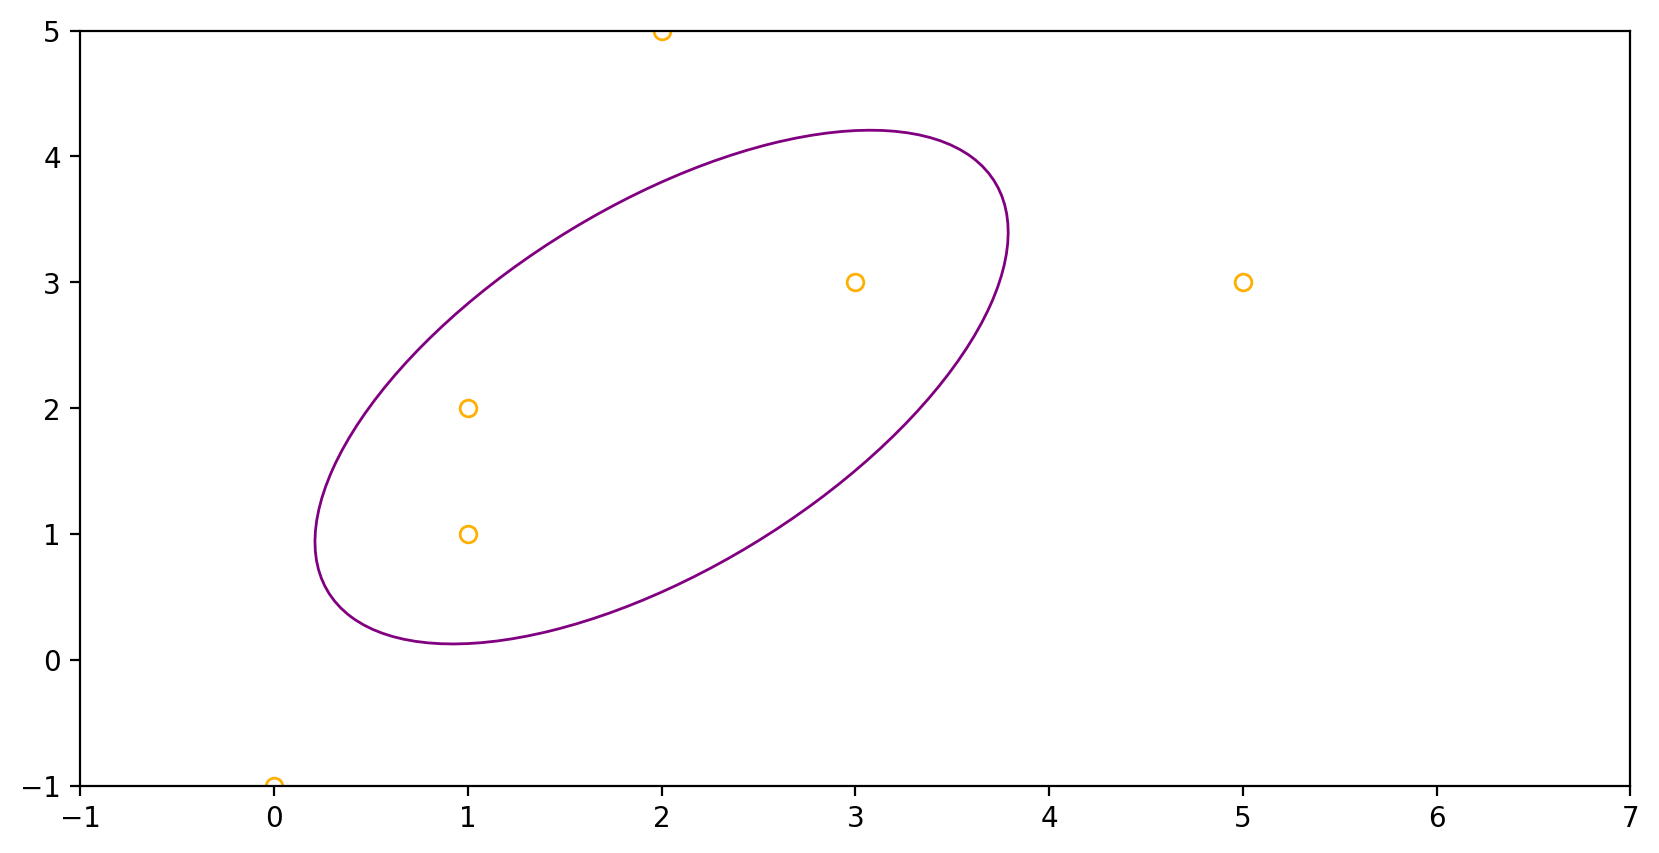

In [11]:
from a6_utils import drawEllipse

def read_data(filename):
    with open(filename) as f:
        s = f.read()
    return np.fromstring(s, sep=' ')

def draw_points(x,y,hex):
    plt.plot( x, y, 'o' ,markerfacecolor='none', color=hex )

points = read_data("./data/points.txt").reshape((6,2))
mu = [np.mean(points[:,0]),np.mean(points[:,1])]
d = np.copy(points)
d[:] = d[:] - mu
c = d.T @ d / 5
plt.ylim(-1,5)
plt.xlim(-1,7)

drawEllipse(mu,c)
draw_points(points[:,0],points[:,1],"#FFAF00")


[[-0.62666599 -0.77928797]
 [-0.77928797  0.62666599]] [5.93580112 1.43086555] [[-0.62666599 -0.77928797]
 [-0.77928797  0.62666599]]


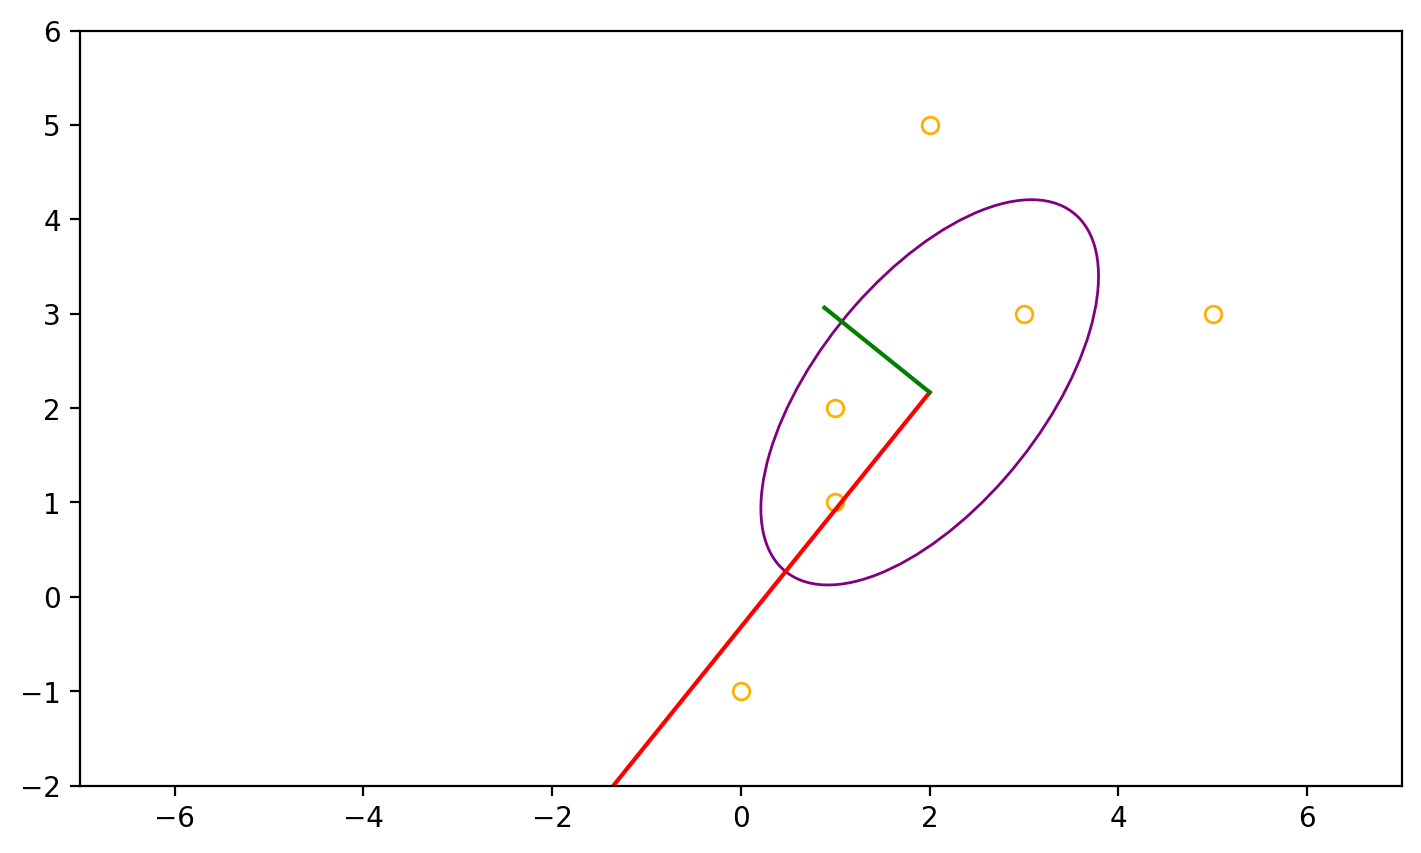

In [12]:
points = read_data("./data/points.txt").reshape((6,2))
mu = [np.mean(points[:,0]),np.mean(points[:,1])]
d = np.copy(points)
d[:] = d[:] - mu
c = d.T @ d / 5
u,s,v = np.linalg.svd(c)
print(u,s,v)
plt.ylim(-2,6)
plt.xlim(-7,7)
drawEllipse(mu,c)
draw_points(points[:,0],points[:,1],"#FFAF00")
plt.plot( [mu[0],mu[0]+u[0,0]*s[0]],[mu[1],mu[1]+u[1,0]*s[0]],"red")
plt.plot( [mu[0],mu[0]+u[0,1]*s[1]],[mu[1],mu[1]+u[1,1]*s[1]],"green")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

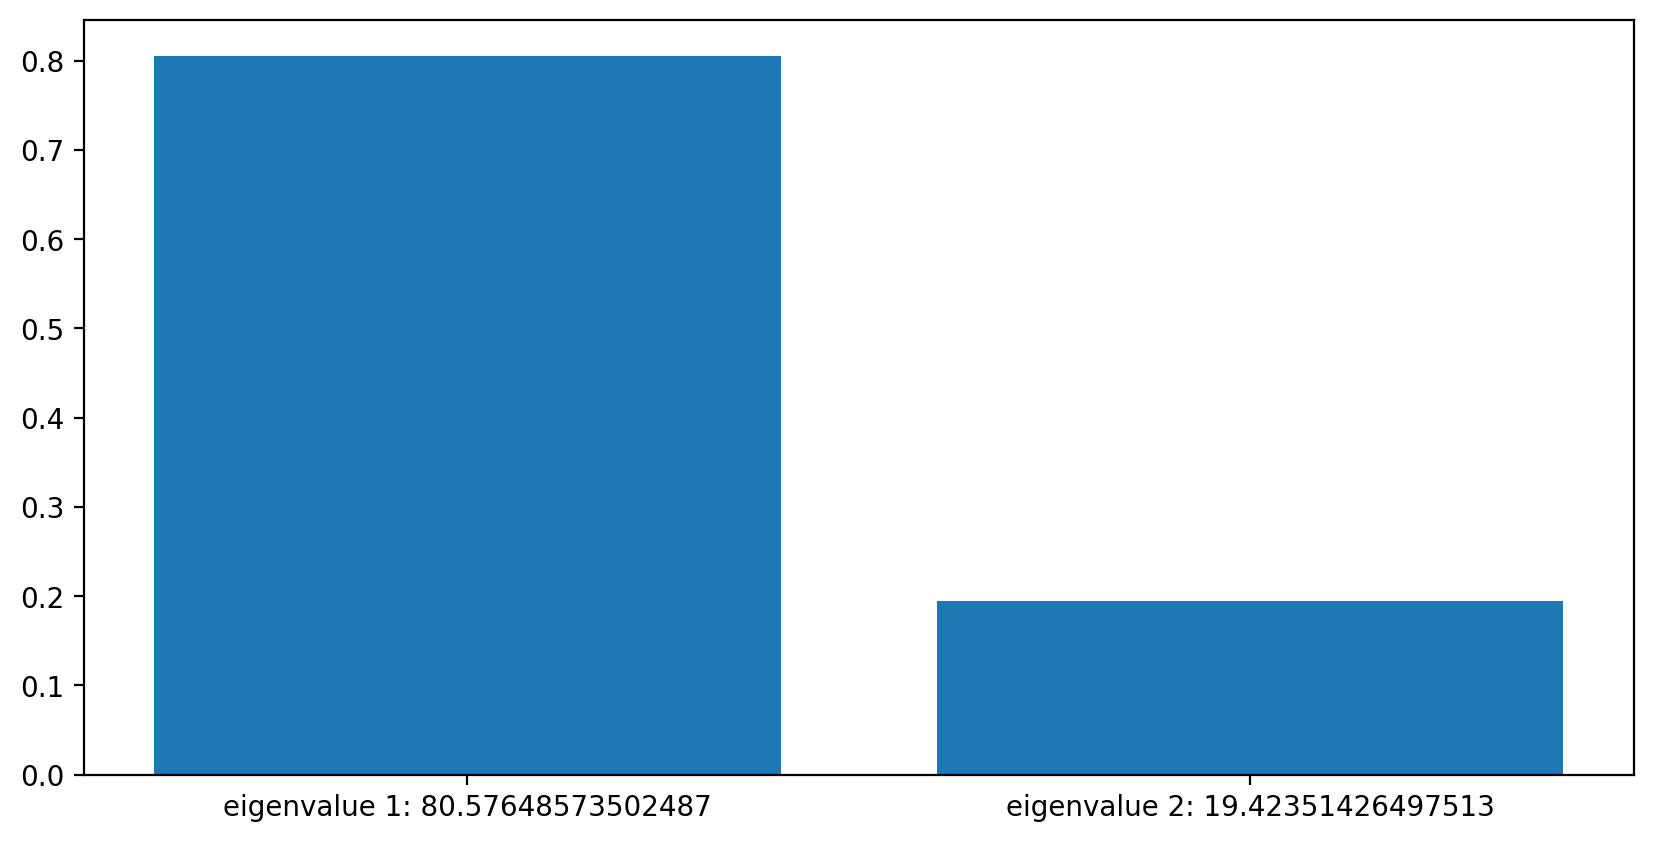

In [13]:
plt.bar(["eigenvalue 1: " + str(s[0]/sum(s) * 100),"eigenvalue 2: " + str(s[1]/sum(s) * 100)],[s[0]/sum(s),s[1]/sum(s)])
plt.show()

In [14]:
points = read_data("./data/points.txt").reshape((5,2))

def pca(points):
    d = np.copy(points)
    mu = np.mean(points,axis=0)
    d[:] = d[:] - mu
    c = d.T @ d / (len(points) -1) 
    u,s,v = np.linalg.svd(c)
    
    u[:,1:] = 0
    new = u.T @ d.T
    new = u @ new
    new = new.T
    new[:] = new[:] + mu

    return mu, u, s, new

# u[:,1] = 0
# new = u.T @ d.T
# new = u @ new
# new = new.T
# new[:] = new[:] + mu

mu, u, s, new = pca(points)
plt.ylim(-2,6)
plt.xlim(-7,7)
drawEllipse(mu,c)
draw_points(new[:,0],new[:,1],"#FFAF00")
plt.plot( [mu[0],mu[0]+u[0,0]*s[0]],[mu[1],mu[1]+u[1,0]*s[0]],"red")
plt.plot( [mu[0],mu[0]+u[0,1]*s[1]],[mu[1],mu[1]+u[1,1]*s[1]],"green")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ValueError: cannot reshape array of size 12 into shape (5,2)

2
[[0.53242911 1.1823843 ]
 [5.54021325 3.16269992]
 [5.35938577 3.09119215]
 [1.5583408  1.58807849]
 [0.00963107 0.97564513]]
[[1. 0.]
 [6. 2.]
 [5. 4.]
 [1. 3.]
 [0. 1.]]
2


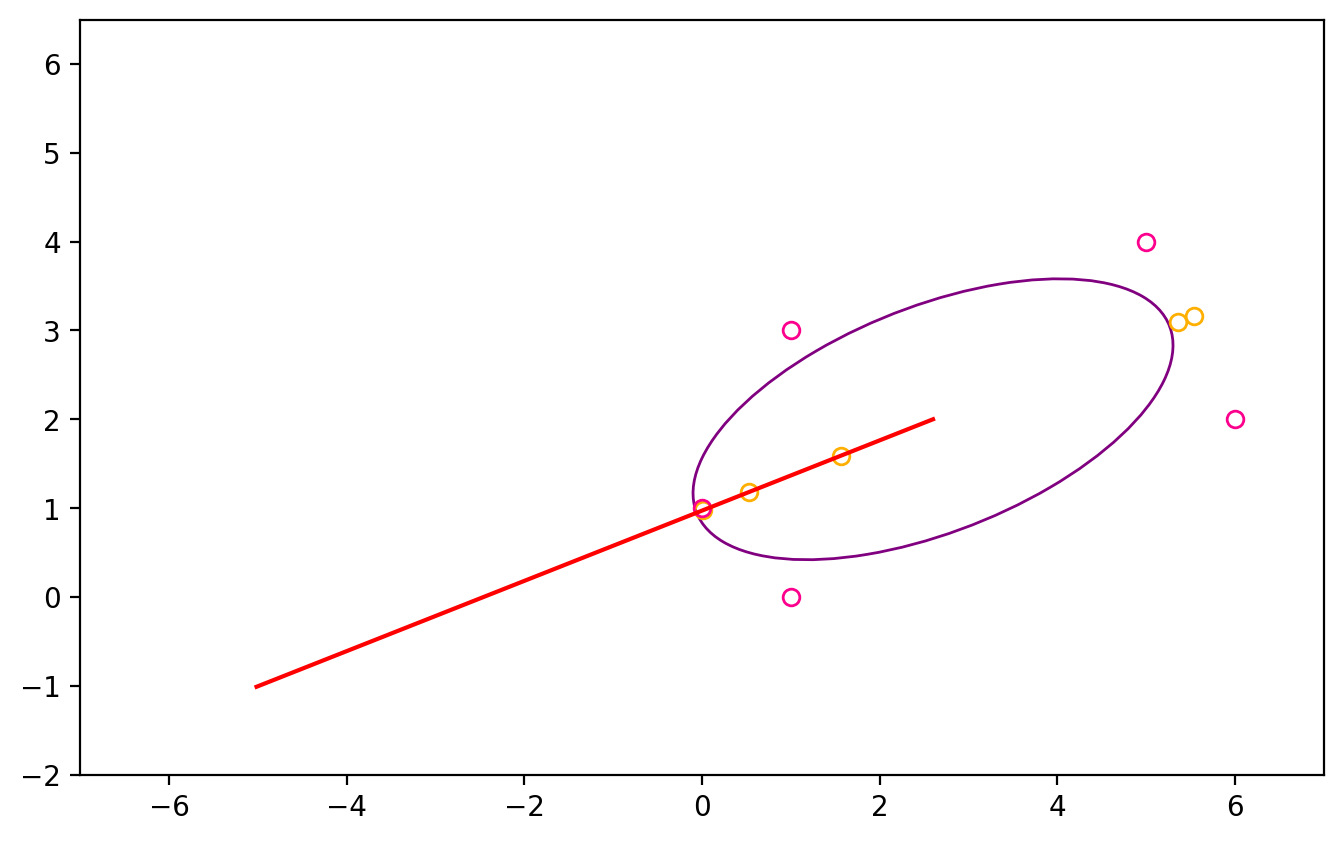

In [ ]:
points = read_data("./data/points.txt").reshape((5,2))
# points = np.append(points,[[3,6]],axis=0)

mu, u, s, new = pca(points)

newp = np.array([3,6])
dist = np.inf
which = -1
for x in range(len(points)-1):
    if np.linalg.norm(newp-points[x]) < dist:
        which = x
        dist = np.linalg.norm(newp-points[x])
print(which)

newpp = np.copy(newp)
newpp = newpp - mu
newpp = newpp.T
newpp = u.T @ newpp.T
newpp = u @ newpp
newpp = newpp.T
newpp = newpp + mu
# _,_,_,newpp = pca([newp])

newpp = np.concatenate((np.array([newp]),np.array([newpp])))
# print(newpp)
print(new)
print(points)
for x in range(len(new)-1):
    if np.linalg.norm(newpp[1]-new[x]) < dist:
        which = x
        dist = np.linalg.norm(newpp[1]-new[x])
print(which)

plt.ylim(-2,6.5)
plt.xlim(-7,7)

d = np.copy(points)
mu = np.mean(points,axis=0)
d[:] = d[:] - mu
drawEllipse(mu, d.T @ d / (len(points)-1) )
draw_points(new[:,0],new[:,1],"#FFAF00")
draw_points(points[:,0],points[:,1],"#FC008D")
# draw_points(newpp[:,0],newpp[:,1],"#5CFC00")

plt.plot( [mu[0],mu[0]+u[0,0]*s[0]],[mu[1],mu[1]+u[1,0]*s[0]],"red")
plt.plot( [mu[0],mu[0]+u[0,1]*s[1]],[mu[1],mu[1]+u[1,1]*s[1]],"green")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [15]:
points = read_data("./data/points.txt").reshape((5,2))

def dualpca(points):
    d = np.copy(points)
    mu = np.mean(points,axis=0)
    d[:] = d[:] - mu
    c = (d @ d.T) / (len(points[0])-1)  
    u,s,v = np.linalg.svd(c)
    u = d.T @ u * np.sqrt(1/(s*(len(points[0])-1)))
    u[:,1:] = 0
    new = u.T @ d.T
    new = u @ new
    new = new.T
    new[:] = new[:] + mu

    return mu, u, s, new

_,_,_,new = dualpca(points)
_,_,_,neww = pca(points)

print(new)
print(neww)

ValueError: cannot reshape array of size 12 into shape (5,2)

In [16]:
def get_data(which):
    im = cv2.imread("./data/faces/{}/001.png".format(which))
    im = im[:,:,0].reshape(-1)
    d = np.zeros((64,len(im)))
    for i in range(1,65):
        im = cv2.imread("./data/faces/{}/{:03d}.png".format(which,i))
        im = im[:,:,0].reshape(-1)
        d[i-1] = im
    return d


C:\Users\Alex\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


(64, 64) (64,) False


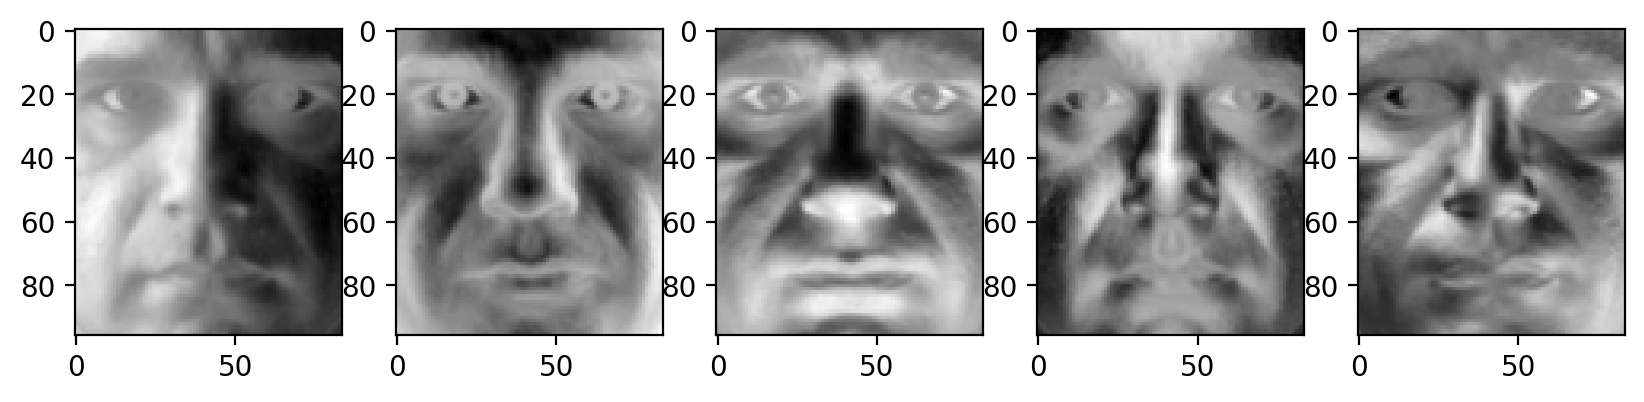

(64, 64)


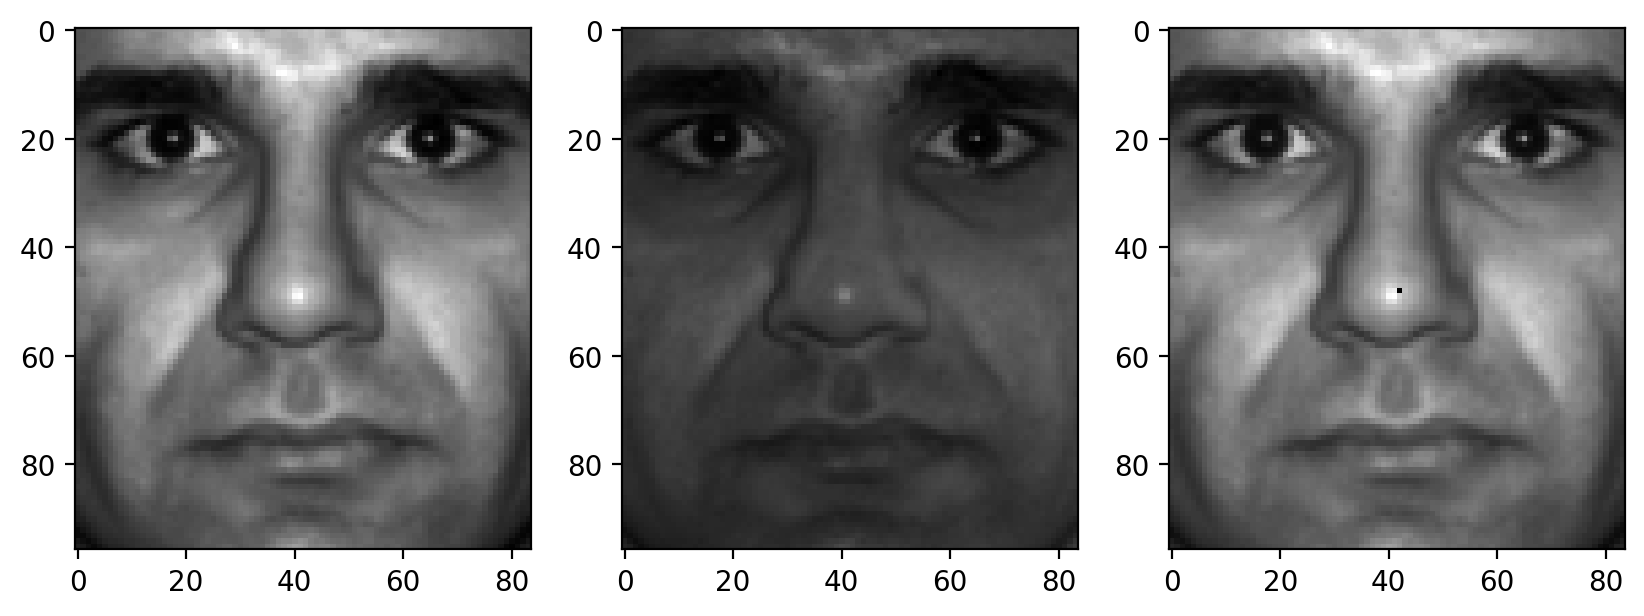

In [21]:

def dualpcaimages(points):
    d = np.copy(points)
    mu = np.mean(points,axis=0)
    d[:] = d[:] - mu
    c = (d @ d.T) / (len(points[0])-1)  
    u,s,v = np.linalg.svd(c)
    print(u)
    print(v.T)
    u = d.T @ u * np.sqrt( (1/(s*(len(points[0])-1)) )+10e-15 )
    uu = np.copy(u)
    # uu[:,1] = 0
    new = uu.T @ d.T
    new = uu @ new
    new = new.T
    new[:] = new[:] + mu
    return mu, u, new

data = get_data(1)
mu,u,new = dualpcaimages(data)
orig = np.copy(new)

for i in range(5):
    im = u[:,i].reshape((96,84))
    plt.subplot(1,5,i+1)
    plt.imshow(im,cmap="gray")
plt.show()

# plt.subplot(1,3,1)
# plt.imshow(data[0].reshape((96,84)),cmap="gray")

plt.subplot(1,3,1)
plt.imshow(new[0].reshape((96,84)),cmap="gray")

d = np.copy(data)
d[:] = d[:] - mu
uu = np.copy(u)
# uu[:,1] = 0
new = (d @ uu).T
print(new.shape)
new[1,:] = 0
# new[:,0] = 0
new = uu @ new
new = new.T
# print(new)
new[:] = new[:] + mu
plt.subplot(1,3,2)
plt.imshow(new[0].reshape((96,84)),vmin=np.amin(orig),vmax=np.amax(orig),cmap="gray")

d = np.copy(data)
d[:] = d[:] - mu
uu = np.copy(u)
# uu[4074,:] = 0
new = uu.T @ d.T
new = uu @ new
new = new.T
new[:] = new[:] + mu

new[0,4074] = 0

plt.subplot(1,3,3)
plt.imshow(new[0].reshape((96,84)),cmap="gray")

plt.show()


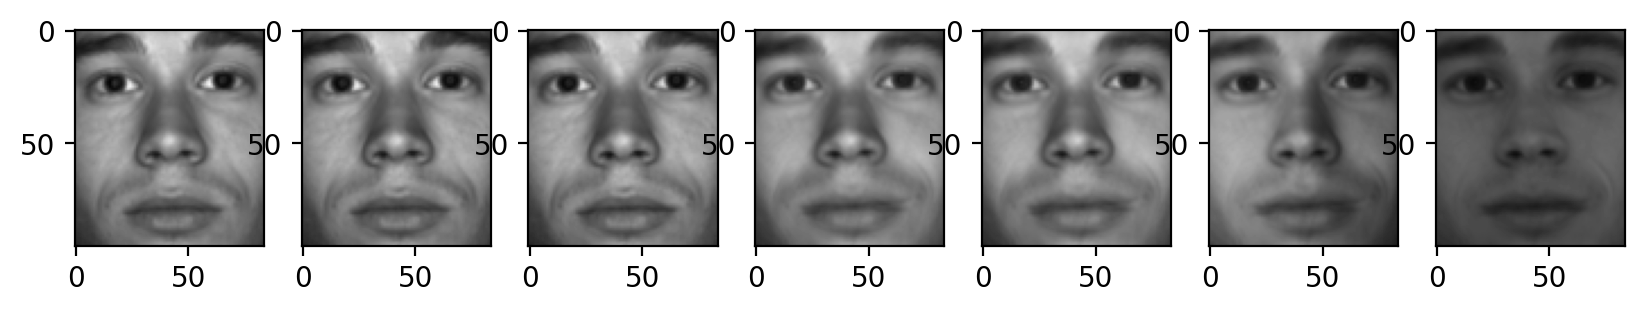

In [ ]:
data = get_data(2)
mu,u,orig = dualpcaimages(data)

d = np.copy(data)
d[:] = d[:] - mu

i = 64
j = 1
while i > 0:
    i /= 2
    i = int(i)
    uu = np.copy(u)
    # uu[:,i:] = 0
    new = uu.T @ d.T
    new[i:,:] = 0
    # new[:,i:] = 0
    new = uu @ new
    new = new.T
    new[:] = new[:] + mu
    plt.subplot(1,7,j)
    plt.imshow(new[0].reshape((96,84)),vmin=np.amin(orig),vmax=np.amax(orig),cmap="gray")
    j += 1

plt.show()


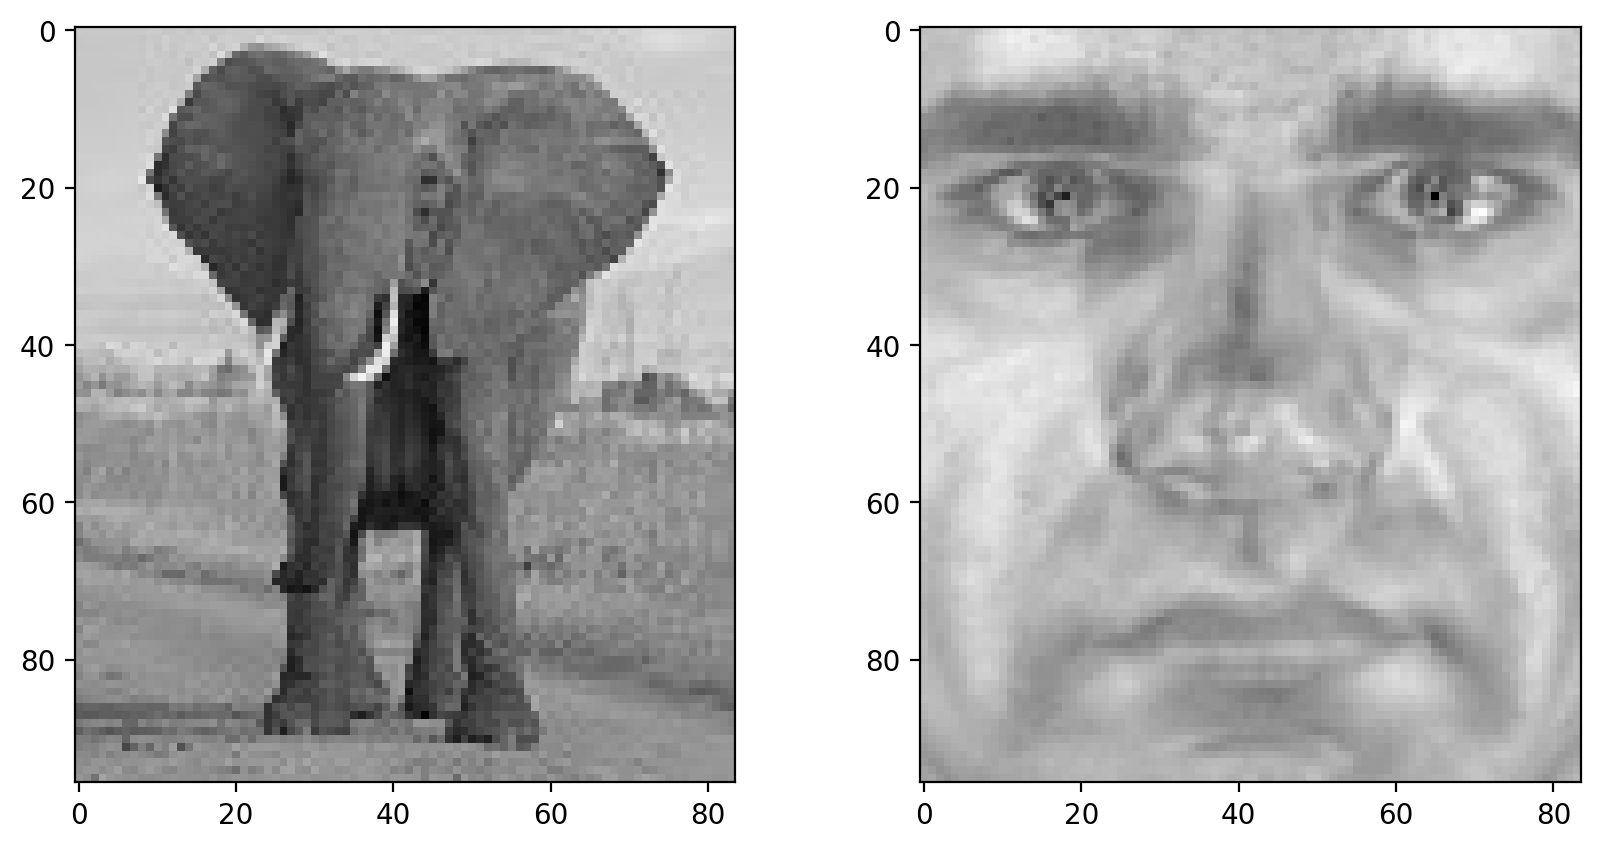

In [ ]:
data = get_data(1)
mu,u,new = dualpcaimages(data)

i = cv2.imread("data/elephant.jpg")
i = i[:,:,0].reshape(-1)

uu = np.copy(u)
# uu[:,i:] = 0
d = i - mu
new = uu.T @ d.T
new = uu @ new
new = new.T
new[:] = new[:] + mu
plt.subplot(1,2,1)
i = cv2.imread("data/elephant.jpg")
plt.imshow(i,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(new.reshape((96,84)),cmap="gray")
plt.show()
